<a href="https://colab.research.google.com/github/Utpal-Mishra/Omdena-France-Local-Chapter-2021-Notebooks/blob/main/OmdenaFrance2021AirPollutionPart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Dependencies**

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from datetime import datetime as dt

### Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import File

In [ ]:
import pandas as pd
path = '/content/drive/My Drive/Final Project/waqi-covid19-airqualitydata-2020.csv'
data = pd.read_csv(path)
print("Data Shape: ", data.shape)
data.head()

# Unit - µg/m³

Data Shape:  (823001, 9)


,Date,Country,City,Specie,count,min,max,median,variance
0,2020-01-16,MN,Ulan Bator,so2,157.0,5.1,76.0,18.1,3716.75
1,2020-03-06,MN,Ulan Bator,so2,206.0,1.1,41.6,13.6,892.86
2,2020-03-14,MN,Ulan Bator,so2,228.0,1.1,41.6,13.1,741.26
3,2020-05-03,MN,Ulan Bator,so2,153.0,0.6,30.8,2.6,210.96
4,2020-02-28,MN,Ulan Bator,so2,209.0,0.9,50.4,10.2,843.79


## **Exploratory Data Analysis**



### Cleaning Data

In [ ]:
data = data[data.City.apply(lambda x: x.isalpha())]
data = data[data.Specie.apply(lambda x: x.isnumeric()==False)]
data = data[data.Specie.apply(lambda x: x == "pm25" or x == "pm10" or x == "no2" or x == "o3" or x == "so2" or x == "co" or x == "pm1")] 
data.sort_values(['Date', 'City', 'Specie'], inplace = True)
data.head()

,Date,Country,City,Specie,count,min,max,median,variance
682572,2019-12-30,SA,Abha,co,2.0,5.0,8.0,5.0,45.0
681515,2019-12-30,SA,Abha,no2,2.0,1.0,5.0,1.0,80.0
682138,2019-12-30,SA,Abha,o3,2.0,34.0,54.0,34.0,2000.0
682611,2019-12-30,SA,Abha,pm10,2.0,3.0,9.0,3.0,180.0
682278,2019-12-30,SA,Abha,so2,2.0,2.0,4.0,2.0,20.0


In [ ]:
# data.to_csv('COVID_2020.csv')
# !cp COVID_2020.csv "/content/drive/My Drive/"

### Adding Class wrt Pollutant Species

In [ ]:
SpecieClass = []
for i in data.Specie:
  if i=="co":
    SpecieClass.append(1)
  if i=="no2":
    SpecieClass.append(2)
  if i=="o3":
    SpecieClass.append(3)
  if i=="pm1":
    SpecieClass.append(4)
  if i=="pm10":
    SpecieClass.append(5)
  if i=="pm25":
    SpecieClass.append(6)
  if i=="so2":
    SpecieClass.append(7)

data["Class"] = SpecieClass


In [ ]:
data.head()

,Date,Country,City,Specie,count,min,max,median,variance,Class
682572,2019-12-30,SA,Abha,co,2.0,5.0,8.0,5.0,45.0,1
681515,2019-12-30,SA,Abha,no2,2.0,1.0,5.0,1.0,80.0,2
682138,2019-12-30,SA,Abha,o3,2.0,34.0,54.0,34.0,2000.0,3
682611,2019-12-30,SA,Abha,pm10,2.0,3.0,9.0,3.0,180.0,5
682278,2019-12-30,SA,Abha,so2,2.0,2.0,4.0,2.0,20.0,7


In [ ]:
data = data[data.Country == "FR"]
print("France Data Dimensions: ", data.shape)

France Data Dimensions:  (13962, 10)


# **ARIMA Model Forecasting**

In [ ]:
Model = pd.DataFrame()

### Time Series Analysis

In [ ]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

In [ ]:
dt = pd.DataFrame(data[["Date", "count"]].groupby("Date").sum()).reset_index()

fig = px.line(dt, x="Date", y="count")
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Total Pollutants", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=450, width=1000, title_text="Frequency of Air Pollutants in France from 2019-20") 
fig.show()

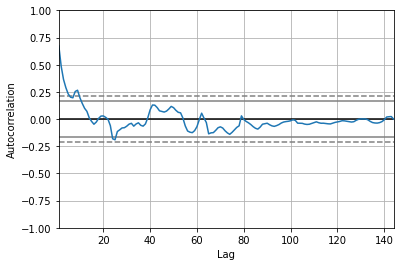

In [ ]:
dt = pd.DataFrame(data[["Date", "count"]].groupby("Date").sum())
pd.plotting.autocorrelation_plot(dt)
pyplot.show()

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot
from pandas import datetime

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
#series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
#dt.index = dt.index.to_period('M')

model = sm.tsa.ARIMA(dt, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1123.253
Method:                       css-mle   S.D. of innovations            623.432
Date:                Mon, 09 Aug 2021   AIC                           2260.506
Time:                        19:36:55   BIC                           2281.246
Sample:                    12-31-2019   HQIC                          2268.934
                         - 05-21-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.8007     28.233      0.312      0.756     -46.535      64.137
ar.L1.D.count    -0.2889      0.085     -3.407      0.001      -0.455      -0.123
ar.L2.D.count    -0.2275      0.088     

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
dt = pd.DataFrame(data[["Date", "count"]].groupby("Date").sum()).reset_index()
dt["residuals"] = residuals
print(residuals.describe())

                 0
count   143.000000
mean      2.486820
std     626.038068
min   -4017.779623
25%    -134.386151
50%       9.357017
75%     152.972505
max    4127.721389


In [ ]:
# fig = px.line(dt, x = dt["Date"], y = dt["residuals"])
# fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_yaxes(title_text = "Residuals", showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_layout(height=450, width=1000, title_text="Frequency of Air Pollutants in France from 2019-20") 
# fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

X = pd.DataFrame(data[["Date", "count"]].groupby("Date").sum()).values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

predictions = list()

for t in range(len(test)):
	model = sm.tsa.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))


rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 251.815


In [ ]:
for i in range(len(test)):
   test[i] = test[i][0]

for i in range(len(predictions)):
   predictions[i] = predictions[i][0]

new_dt = dt[size:].reset_index()
new_dt["test"] = test
new_dt["predictions"] = predictions

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = new_dt.Date, y = new_dt.test, name = "Testing Points in Pollutants"))
fig.add_trace(go.Scatter(x = new_dt.Date, y = new_dt.predictions, name = "Predictions of Pollutant Frequency"))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Pollutants Frequency", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=450, width=1000, title_text="Predictions of Air Pollutants in France") 
fig.show()

### Time Series Plot

In [ ]:
cleandata = pd.DataFrame(data[["Date", "count"]].groupby("Date").sum()).reset_index()

train = cleandata[:int(cleandata.shape[0]*0.80)][["Date", "count"]]
test = cleandata[int(cleandata.shape[0]*0.80):][["Date", "count"]]

train.set_index(['Date'])
test.set_index(['Date'])

print("Training Data: ", train.shape, "Testing Data: ", test.shape)

Training Data:  (115, 2) Testing Data:  (29, 2)


In [ ]:
# train.count.plot(figsize=(15,8), title= 'Frequency of Pollutants in France in Training', fontsize=14)
# test.count.plot(figsize=(15,8), title= 'Frequency of Pollutants in France in Testing', fontsize=14)
# plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x = train.Date, y = train["count"], name = "Frequency of Pollutants in France in Training"))
fig.add_trace(go.Scatter(x = test.Date, y = test["count"], name = "Frequency of Pollutants in France in Testing"))
fig.update_xaxes(title_text = "Index", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Pollutants Frequency", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=450, width=1000, title_text="Train and Test Data on Air Pollutants in France") 
fig.show()

### ARIMA Forecasting

In [ ]:
forecast = cleandata[['Date', 'count']]
forecast.set_index('Date',inplace=True)
forecast

,count
Date,
2019-12-30,7276.0
2019-12-31,7200.0
2020-01-01,6813.0
2020-01-02,8277.0
2020-01-03,8971.0
...,...
2020-05-17,9638.0
2020-05-18,9617.0
2020-05-19,9602.0


In [ ]:
forecast.describe()

,count
count,144.000000
mean,9216.125000
std,844.408378
min,4473.000000
25%,9122.500000
50%,9543.000000
75%,9723.500000
max,10144.000000


In [ ]:
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast["count"], name = "Frequency of Pollutants", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Pollutants Record')
fig.show()

In [ ]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(forecast["count"])

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast["count"])

ADF Test Statistic : -5.271674554778546
p-value : 6.266011325618564e-06
#Lags Used : 0
Number of Observations Used : 143
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


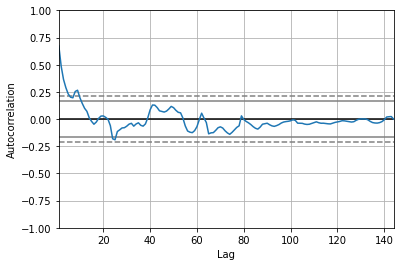

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(forecast["count"])
plt.show()

In [ ]:
!pip install pmdarima

from pmdarima import auto_arima
stepwise_fit = auto_arima(forecast['count'], trace=True, suppress_warnings=True)

     |████████████████████████████████| 1.5 MB 28.9 MB/s 
     |████████████████████████████████| 9.5 MB 46.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2264.784, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2260.451, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2257.574, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2262.793, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2255.286, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2256.414, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2257.830, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2253.587, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2255.707, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2258.489, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2255.509, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2255.1

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(forecast["count"], order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1120.232
Method:                       css-mle   S.D. of innovations            603.748
Date:                Mon, 09 Aug 2021   AIC                           2248.464
Time:                        19:38:26   BIC                           2260.315
Sample:                    12-31-2019   HQIC                          2253.280
                         - 05-21-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.7162      3.586      1.873      0.063      -0.313      13.745
ar.L1.D.count     0.6767      0.066     10.247      0.000       0.547       0.806
ma.L1.D.count    -0.9999      0.023    -44.206      0.000      -1.044      -0.956
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4778           +0.0000j            1.4778            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(forecast["count"], order=(1, 1, 1))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True)
# forecast[['count','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], name = "Pollutants Frequency (Original)", line=dict(color='blue', width=3, dash = "dashdot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Pollutants Frequency (Forecasted)", line=dict(color='red', width=3, dash = "dash")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutants Frequency')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True))
prediction.rename(columns = {0:'Predicted count'}, inplace = True)
prediction.rename(columns = {"predicted_mean":'Predicted count'}, inplace = True)
prediction

,Predicted count
2020-05-01,9634.301656
2020-05-02,9644.035429
2020-05-03,9649.212356
2020-05-04,9651.965715
2020-05-05,9653.430095
...,...
2020-12-28,9655.093742
2020-12-29,9655.093742
2020-12-30,9655.093742
2020-12-31,9655.093742


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], mode='lines+markers', name = "Pollutants Frequency (Original)", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted count'], name = "Pollutants Frequency (Forecasted)", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutants Frequency')
fig.show()

### NO2

In [ ]:
cleandata = data[data.Specie == "no2"]
cleandata = cleandata.groupby('Date').mean().reset_index()
forecast = cleandata[['Date', 'count']]
forecast.set_index('Date',inplace=True)
forecast

,count
Date,
2019-12-30,110.045455
2019-12-31,109.681818
2020-01-01,103.136364
2020-01-02,113.095238
2020-01-03,112.863636
...,...
2020-05-17,117.454545
2020-05-18,119.181818
2020-05-19,117.500000


In [ ]:
forecast.describe()

,count
count,144.000000
mean,115.455522
std,6.864544
min,51.545455
25%,113.397727
50%,115.935065
75%,118.477273
max,126.454545


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast["count"], name = "Frequency of Pollutant NO2", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of NO2", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Pollutants Record of N02')
fig.show()

In [ ]:
### Testing For Stationarity

test_result = adfuller(forecast["count"])

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast["count"])

ADF Test Statistic : -8.473898300627923
p-value : 1.4527855395908077e-13
#Lags Used : 0
Number of Observations Used : 143
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


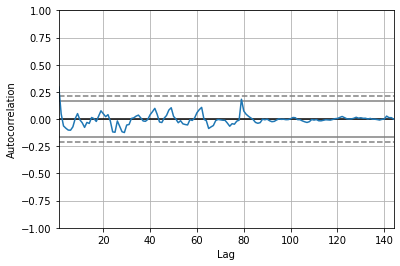

In [ ]:
autocorrelation_plot(forecast["count"])
plt.show()

In [ ]:
stepwise_fit = auto_arima(forecast['count'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=960.065, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=966.445, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=954.777, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=955.278, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1778.838, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=956.455, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=956.557, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=958.545, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.963 seconds


In [ ]:
model = ARIMA(forecast["count"], order=(1, 0, 0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  count   No. Observations:                  144
Model:                     ARMA(1, 0)   Log Likelihood                -474.389
Method:                       css-mle   S.D. of innovations              6.521
Date:                Mon, 09 Aug 2021   AIC                            954.777
Time:                        19:39:00   BIC                            963.687
Sample:                    12-30-2019   HQIC                           958.398
                         - 05-21-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         115.3893      0.782    147.601      0.000     113.857     116.922
ar.L1.count     0.3066      0.081      3.790      0.000       0.148       0.465
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2614           +0.0000j            3.2614            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model = sm.tsa.statespace.SARIMAX(forecast["count"], order=(1, 0, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True)
# forecast[['count','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], name = "Pollutant NO2 Frequency (Original)", line=dict(color='blue', width=3, dash = "dashdot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Pollutant NO2 Frequency (Forecasted)", line=dict(color='red', width=3, dash = "dash")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of NO2", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant NO2 Frequency')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True))
prediction.rename(columns = {0:'Predicted count'}, inplace = True)
prediction.rename(columns = {"predicted_mean":'Predicted count'}, inplace = True)
prediction

,Predicted count
2020-05-01,114.455607
2020-05-02,114.139363
2020-05-03,113.823993
2020-05-04,113.509494
2020-05-05,113.195864
...,...
2020-12-28,58.754961
2020-12-29,58.592619
2020-12-30,58.430726
2020-12-31,58.269280


In [ ]:
Model["Date"] = prediction.index
Model["NO2"] = prediction['Predicted count'].values

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], mode='lines+markers', name = "Pollutant NO2 Frequency (Original)", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted count'], name = "Pollutant NO2 Frequency (Forecasted)", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of NO2", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant NO2 Frequency')
fig.show()

### O3

In [ ]:
cleandata = data[data.Specie == "o3"]
cleandata = cleandata.groupby('Date').mean().reset_index()
forecast = cleandata[['Date', 'count']]
forecast.set_index('Date',inplace=True)
forecast

,count
Date,
2019-12-30,44.761905
2019-12-31,40.523810
2020-01-01,43.350000
2020-01-02,70.700000
2020-01-03,79.285714
...,...
2020-05-17,90.666667
2020-05-18,91.428571
2020-05-19,90.523810


In [ ]:
forecast.describe()

,count
count,144.000000
mean,81.906244
std,13.858069
min,40.523810
25%,82.928571
50%,87.000000
75%,89.666071
max,97.285714


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast["count"], name = "Frequency of Pollutant O3", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of O3", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Pollutants Record of O3')
fig.show()

In [ ]:
### Testing For Stationarity

test_result = adfuller(forecast["count"])

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast["count"])

ADF Test Statistic : -3.841152089141054
p-value : 0.0025132515591490545
#Lags Used : 0
Number of Observations Used : 143
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


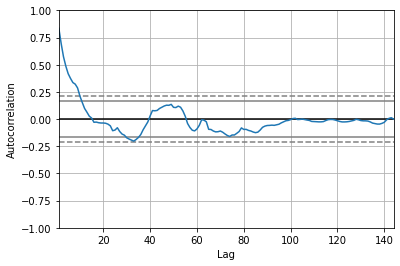

In [ ]:
autocorrelation_plot(forecast["count"])
plt.show()

In [ ]:
stepwise_fit = auto_arima(forecast['count'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=976.869, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=977.745, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=977.593, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=974.972, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.828 seconds


In [ ]:
model = ARIMA(forecast["count"], order=(0, 1, 0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  143
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -486.434
Method:                           css   S.D. of innovations              7.262
Date:                Mon, 09 Aug 2021   AIC                            976.869
Time:                        19:39:02   BIC                            982.795
Sample:                    12-31-2019   HQIC                           979.277
                         - 05-21-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1950      0.607      0.321      0.749      -0.995       1.385
==============================================================================
"""

In [ ]:
model = sm.tsa.statespace.SARIMAX(forecast["count"], order=(0, 1, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True)
# forecast[['count','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], name = "Pollutant O3 Frequency (Original)", line=dict(color='blue', width=3, dash = "dashdot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Pollutant O3 Frequency (Forecasted)", line=dict(color='red', width=3, dash = "dash")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of O3", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant O3 Frequency')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True))
prediction.rename(columns = {0:'Predicted count'}, inplace = True)
prediction.rename(columns = {"predicted_mean":'Predicted count'}, inplace = True)
prediction

,Predicted count
2020-05-01,90.333333
2020-05-02,90.333333
2020-05-03,90.333333
2020-05-04,90.333333
2020-05-05,90.333333
...,...
2020-12-28,90.333333
2020-12-29,90.333333
2020-12-30,90.333333
2020-12-31,90.333333


In [ ]:
Model["O3"] = prediction['Predicted count'].values

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], mode='lines+markers', name = "Pollutant O3 Frequency (Original)", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted count'], name = "Pollutant O3 Frequency (Forecasted)", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of O3", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant O3 Frequency')
fig.show()

### PM10

In [ ]:
cleandata = data[data.Specie == "pm10"]
cleandata = cleandata.groupby('Date').mean().reset_index()
forecast = cleandata[['Date', 'count']]
forecast.set_index('Date',inplace=True)
forecast

,count
Date,
2019-12-30,115.409091
2019-12-31,114.954545
2020-01-01,109.181818
2020-01-02,120.428571
2020-01-03,119.954545
...,...
2020-05-17,124.863636
2020-05-18,121.863636
2020-05-19,119.454545


In [ ]:
forecast.describe()

,count
count,144.000000
mean,121.832116
std,6.957425
min,56.954545
25%,120.378247
50%,123.272727
75%,125.147727
max,130.863636


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast["count"], name = "Frequency of Pollutant PM10", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of PM10", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Pollutants Record of PM10')
fig.show()

In [ ]:
### Testing For Stationarity

test_result = adfuller(forecast["count"])

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast["count"])

ADF Test Statistic : -7.616370958939899
p-value : 2.1863814771939967e-11
#Lags Used : 0
Number of Observations Used : 143
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


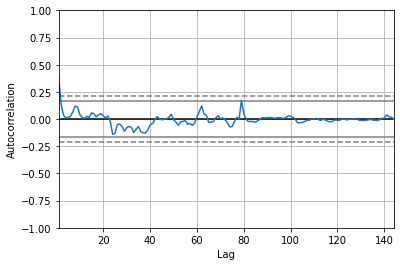

In [ ]:
autocorrelation_plot(forecast["count"])
plt.show()

In [ ]:
stepwise_fit = auto_arima(forecast['count'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=955.563, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=970.316, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=949.588, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=952.271, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1794.281, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=951.575, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=951.575, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=953.573, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.796 seconds


In [ ]:
model = ARIMA(forecast["count"], order=(1, 0, 0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  count   No. Observations:                  144
Model:                     ARMA(1, 0)   Log Likelihood                -471.794
Method:                       css-mle   S.D. of innovations              6.403
Date:                Mon, 09 Aug 2021   AIC                            949.588
Time:                        19:39:05   BIC                            958.498
Sample:                    12-30-2019   HQIC                           953.209
                         - 05-21-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         121.7180      0.875    139.051      0.000     120.002     123.434
ar.L1.count     0.3926      0.079      4.970      0.000       0.238       0.547
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5474           +0.0000j            2.5474            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model = sm.tsa.statespace.SARIMAX(forecast["count"], order=(1, 0, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True)
# forecast[['count','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], name = "Pollutant PM10 Frequency (Original)", line=dict(color='blue', width=3, dash = "dashdot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Pollutant PM10 Frequency (Forecasted)", line=dict(color='red', width=3, dash = "dash")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of PM10", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant PM10 Frequency')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True))
prediction.rename(columns = {0:'Predicted count'}, inplace = True)
prediction.rename(columns = {"predicted_mean":'Predicted count'}, inplace = True)
prediction

,Predicted count
2020-05-01,124.804644
2020-05-02,124.519035
2020-05-03,124.234078
2020-05-04,123.949774
2020-05-05,123.666121
...,...
2020-12-28,71.851406
2020-12-29,71.686977
2020-12-30,71.522925
2020-12-31,71.359248


In [ ]:
Model["PM10"] = prediction['Predicted count'].values

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], mode='lines+markers', name = "Pollutant PM10 Frequency (Original)", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted count'], name = "Pollutant PM10 Frequency (Forecasted)", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of PM10", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant PM10 Frequency')
fig.show()

### PM2.5

In [ ]:
cleandata = data[data.Specie == "pm25"]
cleandata = cleandata.groupby('Date').mean().reset_index()
forecast = cleandata[['Date', 'count']]
forecast.set_index('Date',inplace=True)
forecast

,count
Date,
2019-12-30,52.947368
2019-12-31,53.947368
2020-01-01,50.578947
2020-01-02,81.833333
2020-01-03,87.894737
...,...
2020-05-17,108.500000
2020-05-18,102.315789
2020-05-19,109.578947


In [ ]:
forecast.describe()

,count
count,144.000000
mean,96.321362
std,15.710336
min,46.789474
25%,92.789474
50%,102.916667
75%,106.325077
max,111.000000


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast["count"], name = "Frequency of Pollutant PM2.5", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of PM2.5", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Pollutants Record of PM2.5')
fig.show()

In [ ]:
### Testing For Stationarity

test_result = adfuller(forecast["count"])

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast["count"])

ADF Test Statistic : -4.050338082384915
p-value : 0.0011686920518111715
#Lags Used : 0
Number of Observations Used : 143
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


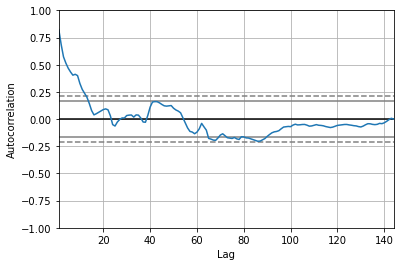

In [ ]:
autocorrelation_plot(forecast["count"])
plt.show()

In [ ]:
stepwise_fit = auto_arima(forecast['count'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1026.313, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1025.870, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1025.154, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1024.444, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.846 seconds


In [ ]:
model = ARIMA(forecast["count"], order=(0, 1, 0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  143
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -511.156
Method:                           css   S.D. of innovations              8.633
Date:                Mon, 09 Aug 2021   AIC                           1026.313
Time:                        19:39:25   BIC                           1032.238
Sample:                    12-31-2019   HQIC                          1028.721
                         - 05-21-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2617      0.722      0.362      0.718      -1.153       1.677
==============================================================================
"""

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(forecast["count"], order=(0, 1, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True)
# forecast[['count','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], name = "Pollutant PM2.5 Frequency (Original)", line=dict(color='blue', width=3, dash = "dashdot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Pollutant PM2.5 Frequency (Forecasted)", line=dict(color='red', width=3, dash = "dash")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of PM2.5", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant PM2.5 Frequency')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True))
prediction.rename(columns = {0:'Predicted count'}, inplace = True)
prediction.rename(columns = {"predicted_mean":'Predicted count'}, inplace = True)
prediction

,Predicted count
2020-05-01,103.631579
2020-05-02,103.631579
2020-05-03,103.631579
2020-05-04,103.631579
2020-05-05,103.631579
...,...
2020-12-28,103.631579
2020-12-29,103.631579
2020-12-30,103.631579
2020-12-31,103.631579


In [ ]:
Model["PM2.5"] = prediction['Predicted count'].values

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], mode='lines+markers', name = "Pollutant PM2.5 Frequency (Original)", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted count'], name = "Pollutant PM2.5 Frequency (Forecasted)", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of PM2.5", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant PM2.5 Frequency')
fig.show()

### SO2

In [ ]:
cleandata = data[data.Specie == "so2"]
cleandata = cleandata.groupby('Date').mean().reset_index()
forecast = cleandata[['Date', 'count']]
forecast.set_index('Date',inplace=True)
forecast

,count
Date,
2019-12-30,29.625000
2019-12-31,30.875000
2020-01-01,26.142857
2020-01-02,24.100000
2020-01-03,25.600000
...,...
2020-05-17,25.625000
2020-05-18,21.444444
2020-05-19,22.444444


In [ ]:
forecast.describe()

,count
count,144.000000
mean,26.312583
std,5.217195
min,12.600000
25%,22.561111
50%,25.817460
75%,30.055556
max,41.000000


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast["count"], name = "Frequency of Pollutant SO2", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of SO2", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Pollutants Record of SO2')
fig.show()

In [ ]:
### Testing For Stationarity

test_result = adfuller(forecast["count"])

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast["count"])

ADF Test Statistic : -6.04132566505224
p-value : 1.3438076834274142e-07
#Lags Used : 1
Number of Observations Used : 142
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


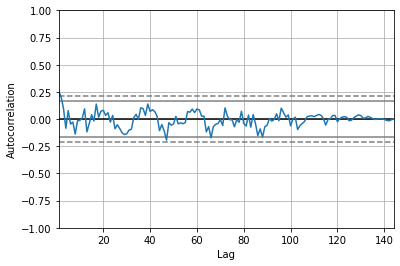

In [ ]:
autocorrelation_plot(forecast["count"])
plt.show()

In [ ]:
stepwise_fit = auto_arima(forecast['count'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=880.611, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=887.415, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=879.405, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=881.869, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1357.943, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=878.125, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=880.077, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=880.112, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=879.010, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=876.637, Time=0.41 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=876.824, Time=0.49 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=881.618, Time=0.48 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=878.802, Time=0.10 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=879.056, Time=0.57 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf,

In [ ]:
model = ARIMA(forecast["count"], order=(3, 0, 1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  count   No. Observations:                  144
Model:                     ARMA(3, 1)   Log Likelihood                -432.318
Method:                       css-mle   S.D. of innovations              4.865
Date:                Mon, 09 Aug 2021   AIC                            876.637
Time:                        19:39:12   BIC                            894.455
Sample:                    12-30-2019   HQIC                           883.877
                         - 05-21-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.2784      0.697     37.703      0.000      24.912      27.644
ar.L1.count    -0.6260      0.113     -5.529      0.000      -0.848      -0.404
ar.L2.count     0.3188      0.097      3.275      0.001       0.128       0.510
ar.L3.count     0.2278      0.083      2.748      0.007       0.065       0.390
ma.L1.count     0.8695      0.087      9.999      0.000       0.699       1.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7096           -0.0000j            1.7096           -0.0000
AR.2           -1.5546           -0.3885j            1.6024           -0.4610
AR.3           -1.5546           +0.3885j            1.6024            0.4610
MA.1           -1.1502           +0.0000j            1.1502            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(forecast["count"], order=(3, 0, 1))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True)
# forecast[['count','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], name = "Pollutant SO2 Frequency (Original)", line=dict(color='blue', width=3, dash = "dashdot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Pollutant SO2 Frequency (Forecasted)", line=dict(color='red', width=3, dash = "dash")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of SO2", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant SO2 Frequency')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True))
prediction.rename(columns = {0:'Predicted count'}, inplace = True)
prediction.rename(columns = {"predicted_mean":'Predicted count'}, inplace = True)
prediction

,Predicted count
2020-05-01,28.052567
2020-05-02,28.132808
2020-05-03,27.179556
2020-05-04,26.971002
2020-05-05,26.770451
...,...
2020-12-28,26.584746
2020-12-29,26.584738
2020-12-30,26.584731
2020-12-31,26.584723


In [ ]:
Model["SO2"] = prediction['Predicted count'].values

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], mode='lines+markers', name = "Pollutant SO2 Frequency (Original)", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted count'], name = "Pollutant SO2 Frequency (Forecasted)", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of SO2", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant SO2 Frequency')
fig.show()

### CO

In [ ]:
cleandata = data[data.Specie == "co"]
cleandata = cleandata.groupby('Date').mean().reset_index()
forecast = cleandata[['Date', 'count']]
forecast.set_index('Date',inplace=True)
forecast

,count
Date,
2019-12-30,26.6
2019-12-31,27.0
2020-01-01,26.2
2020-01-02,49.0
2020-01-03,51.6
...,...
2020-05-17,49.0
2020-05-18,51.4
2020-05-19,40.8


In [ ]:
forecast.describe()

,count
count,144.000000
mean,55.861111
std,13.638967
min,26.200000
25%,48.000000
50%,55.500000
75%,65.500000
max,86.400000


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast["count"], name = "Frequency of Pollutant CO", line=dict(color='purple', width=4, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of CO", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Pollutants Record of CO')
fig.show()

In [ ]:
### Testing For Stationarity

test_result = adfuller(forecast["count"])

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(prcp):
    result = adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
      
adfuller_test(forecast["count"])

ADF Test Statistic : -3.2037181566281507
p-value : 0.019770463971038467
#Lags Used : 4
Number of Observations Used : 139
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


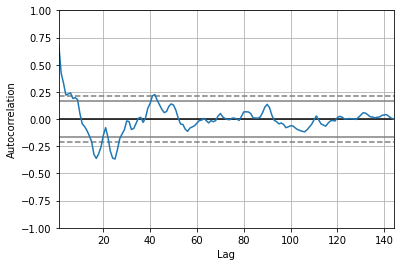

In [ ]:
autocorrelation_plot(forecast["count"])
plt.show()

In [ ]:
stepwise_fit = auto_arima(forecast['count'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1164.175, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1072.066, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1083.005, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1577.522, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1073.401, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1072.638, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1093.461, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.057 seconds


In [ ]:
model = ARIMA(forecast["count"], order=(2, 0, 0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  count   No. Observations:                  144
Model:                     ARMA(2, 0)   Log Likelihood                -532.700
Method:                       css-mle   S.D. of innovations              9.757
Date:                Mon, 09 Aug 2021   AIC                           1073.401
Time:                        19:39:15   BIC                           1085.280
Sample:                    12-30-2019   HQIC                          1078.228
                         - 05-21-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.3947      2.509     22.078      0.000      50.477      60.312
ar.L1.count     0.7483      0.083      9.017      0.000       0.586       0.911
ar.L2.count    -0.0690      0.085     -0.817      0.416      -0.235       0.097
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5613           +0.0000j            1.5613            0.0000
AR.2            9.2788           +0.0000j            9.2788            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model = sm.tsa.statespace.SARIMAX(forecast["count"], order=(2, 0, 0))
results = model.fit()

forecast['Forecast'] = results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True)
# forecast[['count','Forecast']].plot(figsize=(12,8))

fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], name = "Pollutant CO Frequency (Original)", line=dict(color='blue', width=3, dash = "dashdot")))
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['Forecast'], name = "Seasonal First Difference Pollutant CO Frequency (Forecasted)", line=dict(color='red', width=3, dash = "dash")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of CO", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant CO Frequency')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
prediction = pd.DataFrame(results.predict(start = "2020-05-01", end = "2021-01-01", dynamic=True))
prediction.rename(columns = {0:'Predicted count'}, inplace = True)
prediction.rename(columns = {"predicted_mean":'Predicted count'}, inplace = True)
prediction

,Predicted count
2020-05-01,45.766204
2020-05-02,45.024807
2020-05-03,44.270565
2020-05-04,43.531237
2020-05-05,42.804046
...,...
2020-12-28,0.789937
2020-12-29,0.776742
2020-12-30,0.763767
2020-12-31,0.751008


In [ ]:
Model["CO"] = prediction['Predicted count'].values

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.index, y = forecast['count'], mode='lines+markers', name = "Pollutant CO Frequency (Original)", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = prediction.index, y = prediction['Predicted count'], name = "Pollutant CO Frequency (Forecasted)", line=dict(color='red', width=2, dash = "dot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency of CO", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='France Seasonal First Difference in Pollutant CO Frequency')
fig.show()

# **Prediction Plot**

In [ ]:
Model['Date'] = pd.to_datetime(Model['Date']).dt.date

fig = go.Figure()
fig.add_trace(go.Scatter(x = Model.Date, y = Model['NO2'], mode='lines', name = "Pollutant NO2 Frequency (Forecasted)", line=dict(color='purple', width=2)))
fig.add_trace(go.Scatter(x = Model.Date, y = Model['O3'], name = "Pollutant O3 Frequency (Forecasted)", line=dict(color='red', width=2, dash = "dot")))
fig.add_trace(go.Scatter(x = Model.Date, y = Model['PM10'], mode='markers', name = "Pollutant PM10 Frequency (Forecasted)", line=dict(color='orange', width=1)))
fig.add_trace(go.Scatter(x = Model.Date, y = Model['PM2.5'], name = "Pollutant PM2.5 Frequency (Forecasted)", line=dict(color='blue', width=2, dash = "dash")))
fig.add_trace(go.Scatter(x = Model.Date, y = Model['SO2'], mode='lines+markers', name = "Pollutant SO2 Frequency (Forecasted)", line=dict(color='brown', width=1)))
fig.add_trace(go.Scatter(x = Model.Date, y = Model['CO'], name = "Pollutant CO Frequency (Forecasted)", line=dict(color='green', width=2, dash = "dashdot")))
fig.update_xaxes(title_text = "Date", rangeslider_visible=True, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Frequency Predicted", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(height=500, width=1000, title='Predicted Pollutants Frequency')
fig.show()